In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../Preprocess/Preprocess.csv")

In [3]:
df.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,42.098597,2.377042,0.378701,0.269903,32.476493,20.131194,19.830514,29.753889,2.439608,154.966895,804.314569,630.264466,0.0
1,44.560389,1.889646,0.215486,0.244556,28.960708,18.765649,20.916111,27.642535,2.883990,231.153622,803.925649,659.373538,0.0
2,50.777618,4.491722,0.745514,0.397743,49.597222,35.021854,21.357729,30.954847,1.604234,178.251752,803.767500,485.725435,0.0
3,50.881806,4.101944,0.455646,0.384681,48.555437,35.872396,21.968729,35.661208,1.729689,183.150144,804.870299,422.336301,0.0
4,52.673167,4.675542,0.458521,0.442660,52.817632,41.230729,21.668757,42.649750,1.900280,137.419527,805.930109,449.436559,0.2


In [5]:
ss = StandardScaler()
X_ss = ss.fit_transform(df)
df_ss = pd.DataFrame(X_ss, columns=df.columns)
df_ss.head()

,O3,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Press_Avg,Rad_Avg,Rain_Tot
0,0.802358,-1.231678,-0.678739,-0.590265,0.729599,0.338225,0.516847,-1.937073,1.615577,0.327731,-1.068511,1.331083,-0.353445
1,1.047696,-1.475738,-0.919847,-0.835044,0.407410,0.164196,0.882199,-2.068812,2.421619,2.737093,-1.343043,1.570084,-0.353445
2,1.667294,-0.172765,-0.136869,0.644294,2.298555,2.235927,1.030824,-1.862139,0.100333,1.064102,-1.454678,0.144340,-0.353445
3,1.677677,-0.367944,-0.565073,0.518149,2.203085,2.344322,1.236453,-1.568483,0.327889,1.219010,-0.676230,-0.376119,-0.353445
4,1.856201,-0.080719,-0.560826,1.078057,2.593676,3.027201,1.135499,-1.132429,0.637315,-0.227195,0.071874,-0.153611,-0.304880


In [7]:
pca = PCA().fit(df_ss)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

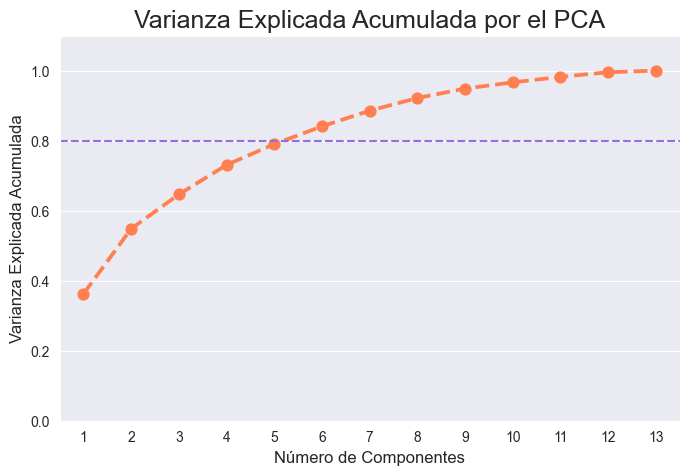

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.pointplot(x=range(1, len(explained)+1), y=cumulative, markers='o', linestyles='--', color="coral")
plt.title('Varianza Explicada Acumulada por el PCA', fontsize=18)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.axhline(y=0.8, color='mediumpurple', linestyle='--')
plt.ylim(0, 1.1)
plt.show()

In [10]:
pca = PCA(n_components=6)
df_ss_pca = pd.DataFrame(data=pca.fit_transform(df_ss), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
df_ss_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.164672,-0.803202,-1.025820,0.282816,0.014760,0.472629
1,-4.436239,-1.987863,-1.349363,-0.267252,0.598739,0.754170
2,-3.843192,1.914272,0.351344,-1.291032,-0.564044,-0.216747
3,-3.791167,1.602657,0.900057,-1.082825,-0.050485,-0.877389
4,-3.496826,2.692341,1.287733,-0.559267,0.181786,-1.055199


In [11]:
df_ss.to_csv("Standarized.csv", index=False)
df_ss_pca.to_csv("PCA.csv", index=False)